In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

conn = sqlite3.connect("database.sqlite")

player_attributes = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)

match_df = pd.read_sql_query("SELECT * FROM Match", conn)

conn.close()


In [12]:
#opdracht1 datframe met iedere speler daarin met het gemiddelde van alle numerieke ratings.
numeric_cols = player_attributes.select_dtypes(include=['float64', 'int64']).columns

player_avg_attributes = player_attributes.groupby('player_api_id')[numeric_cols].mean()

player_df= pd.DataFrame(player_avg_attributes)
player_df
""" create a new data frame in which there is only one row for each player, containing the average of all numerical ratings.
    
    parameters:
    -----------
    player_attributes: pandas datframe
         Dataframe  containing data that is needed to make new data frame .
    
    numeric_cols: 
         which filters the columns based on the specified data types. 
    player_avg_attributes:
    the code calculates the average values of the the player_attributes DataFrame for each player in the dataset.
        
    returns:
    player_df create a new dataframe in which there is only one row for each player containing the average of all ratings.
    """

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
player_api_id,,,,,,,,,,,,,,,,,,,,,
2625,139850.5,148544.0,2625.0,60.142857,61.142857,50.142857,47.285714,46.285714,56.500000,38.000000,...,55.285714,61.928571,62.928571,63.857143,56.571429,12.428571,12.857143,19.071429,10.357143,10.428571
2752,44155.0,135819.0,2752.0,69.380952,70.380952,36.428571,37.428571,75.333333,54.809524,20.428571,...,52.428571,35.428571,71.095238,70.666667,65.571429,11.095238,6.095238,7.095238,9.095238,15.095238
2768,88295.0,110019.0,2768.0,69.285714,70.571429,42.238095,42.761905,66.666667,64.714286,28.761905,...,57.761905,31.904762,71.666667,70.619048,79.714286,10.761905,15.904762,22.714286,15.142857,12.095238
2770,72149.0,182861.0,2770.0,71.133333,73.533333,61.866667,67.666667,67.800000,72.533333,67.133333,...,71.600000,63.933333,30.200000,37.533333,25.000000,8.666667,15.666667,27.200000,16.333333,17.000000
2790,5124.0,110809.0,2790.0,70.200000,75.800000,70.000000,37.400000,55.200000,68.000000,43.000000,...,60.000000,55.400000,74.600000,74.600000,69.000000,8.000000,17.000000,59.000000,16.600000,17.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744907,66607.0,226508.0,744907.0,51.909091,65.909091,42.454545,44.454545,47.454545,59.454545,42.454545,...,51.454545,52.454545,39.454545,48.454545,49.454545,8.454545,13.454545,12.454545,11.454545,8.454545
746419,58305.5,233930.0,746419.0,59.000000,66.000000,55.000000,28.000000,50.000000,35.000000,29.000000,...,40.000000,43.000000,55.000000,69.000000,62.000000,7.000000,10.000000,7.000000,9.000000,9.000000
748432,60180.5,233969.0,748432.0,58.000000,68.000000,48.000000,26.000000,57.000000,49.000000,24.000000,...,36.000000,45.000000,63.000000,69.000000,68.000000,8.000000,8.000000,12.000000,12.000000,6.000000


In [11]:
#opdracht 2
import sqlite3
import pandas as pd

# Load data from SQLite database
conn = sqlite3.connect("database.sqlite")
match_df = pd.read_sql_query("SELECT * FROM Match WHERE season='2015/2016' AND league_id=1729", conn)
player_df = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)
conn.close()
    return overall_rating
""" Extracts the data from the database.sqlite.
    
    parameters:
    -----------
    select: conn
        select all the data where demends are met.
    
    from match: 
         where season is between   2015/2016' AND league_id=1729   
        
    returns:
    match_df all data from Match where the demands are met.
    """

# Get column names for home and away players
home_cols = ['home_player_{}'.format(i) for i in range(1, 12)]
away_cols = ['away_player_{}'.format(i) for i in range(1, 12)]
all_cols = home_cols + away_cols

# Define function to get overall rating for a player
def get_overall_rating(player_id):
    player_attributes = player_df[player_df['player_api_id'] == player_id]
    overall_rating = player_attributes['overall_rating'].mean()
    return overall_rating
""" For each line in the match data frame, adds the overall rating of each player.
    
    parameters:
    -----------
    player_df: Pandas dataframe
        Dataframe Adds the overall rating of each player for each line in the data frame match.
    
    player_id: str
         Column name used to identify player you want to find      
        
    returns:
    
    player_id: Pandas dataframe
        Dataframe Adds the overall rating of each player for each line in the dataframe match.
        """

# Apply function to each player column and add new columns to match_df
for col in all_cols:
    match_df[col+'_rating'] = match_df[col].apply(get_overall_rating)


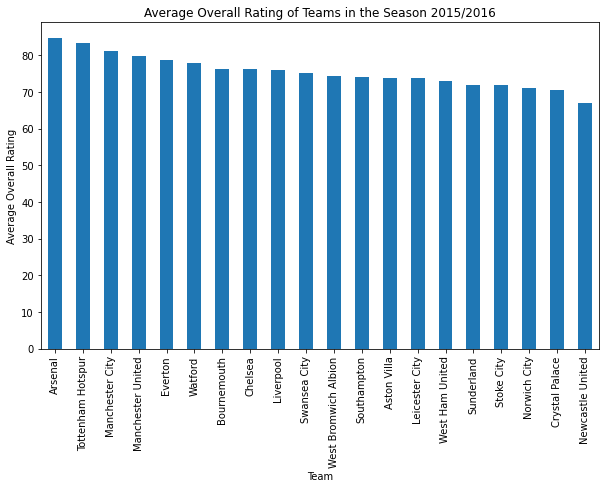

In [4]:
#opdracht 3
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Load data from SQLite database
conn = sqlite3.connect("database.sqlite")
team_df = pd.read_sql_query("SELECT team_api_id, team_long_name FROM Team", conn)
match_df = pd.read_sql_query("SELECT * FROM Match", conn)
player_df = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)
conn.close()
""" Extracts the data from the database.sqlite.
    
    parameters:
    -----------
    team_df: Pandas dataframe
        Dataframe extract the data from this Dataframe.
    
    team_df: 
            SELECT the data  team_api_id, team_long_name FROM Team" from Team.
            
        
    returns:
    
    team_df: Pandas dataframe
        team_df all data from Team where the demands are met.
        """

# Filter data for the 2015/2016 Premier League season
season_df = match_df[(match_df['season'] == '2015/2016') & (match_df['league_id'] == 1729)]
season_df = season_df.merge(team_df, left_on='home_team_api_id', right_on='team_api_id')
season_df = season_df.merge(player_df[['player_api_id', 'overall_rating']], left_on='home_player_1', right_on='player_api_id')

# Calculate average overall rating for each team
team_ratings = season_df.groupby('team_long_name')['overall_rating'].mean().sort_values(ascending=False)

# Plot the average ratings for each team
fig, ax = plt.subplots()
team_ratings.plot(ax=ax, kind='bar', figsize=(10, 6))
ax.set_xlabel('Team')
ax.set_ylabel('Average Overall Rating')
ax.set_title('Average Overall Rating of Teams in the Season 2015/2016')
plt.xticks(rotation=90)
plt.show()


In [ ]:
#markdown cell: dit is bar chart grafiek die per premier club de gemiddelde overal rating laat zien van het seizoen 2015/2016.
# Newcastle united heeft de laagste overal rating en Arsenal de hoogste

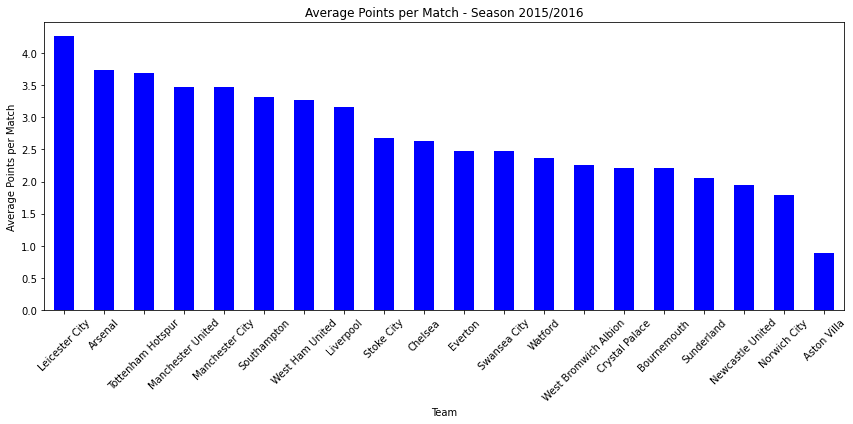

In [5]:
# 4.Maak voor hetzelfde seizoen een visualisatie waarin je het gemiddelde aantal punten per wedstrijd van ieder team laat zien.
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

conn = sqlite3.connect("database.sqlite")

matches_query = """
    SELECT m.id, t1.team_long_name AS home_team, t2.team_long_name AS away_team, m.home_team_goal, m.away_team_goal
    FROM Match m
    INNER JOIN Team t1 ON t1.team_api_id = m.home_team_api_id
    INNER JOIN Team t2 ON t2.team_api_id = m.away_team_api_id
    WHERE m.season = '2015/2016' AND m.league_id = 1729
"""
matches_df = pd.read_sql_query(matches_query, conn)

matches_df['home_points'] = np.where(matches_df['home_team_goal'] > matches_df['away_team_goal'], 3,
                                     np.where(matches_df['home_team_goal'] == matches_df['away_team_goal'], 1, 0))
matches_df['away_points'] = np.where(matches_df['away_team_goal'] > matches_df['home_team_goal'], 3,
                                     np.where(matches_df['away_team_goal'] == matches_df['home_team_goal'], 1, 0))
team_points_df = pd.concat([matches_df.groupby('home_team')['home_points'].mean(),
                            matches_df.groupby('away_team')['away_points'].mean()], axis=1).fillna(0)
team_points_df['total_points'] = team_points_df['home_points'] + team_points_df['away_points']

team_points_df = team_points_df.sort_values('total_points', ascending=False)
""" Extracts the data from the database.sqlite.
    
    parameters:
    -----------
    matches_query: query
        Dataframe extract data from Match and team where  season 2015/2016 and league_id = 1729 .
    
    matches_df: 
            makes a Dataframe from a query.
            home points get 3 points when they score more than away team and 1 point with equal amount of goals.
            away team gets 3 points if they score more goals than home team, and 1 point if they score equal amount of goals.
    team_points_df:
    when away points and home points are combined 

            
        
    returns:
    
    team_points_df: Pandas dataframe
        team_points_df shows the average points per game.
        """
plt.figure(figsize=(12, 6))
team_points_df['total_points'].plot(kind='bar', color='blue')
plt.title('Average Points per Match - Season 2015/2016')
plt.xlabel('Team')
plt.ylabel('Average Points per Match')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

conn.close()


In [ ]:
#markdown cell deze bar chart grafiek laat het gemiddelde aantal punten zien per wedstrijd in het seizoen 2015/2016.
# leicter City heeft de meest gemiddelde punten per wedstrijd en Aston villa de minste.

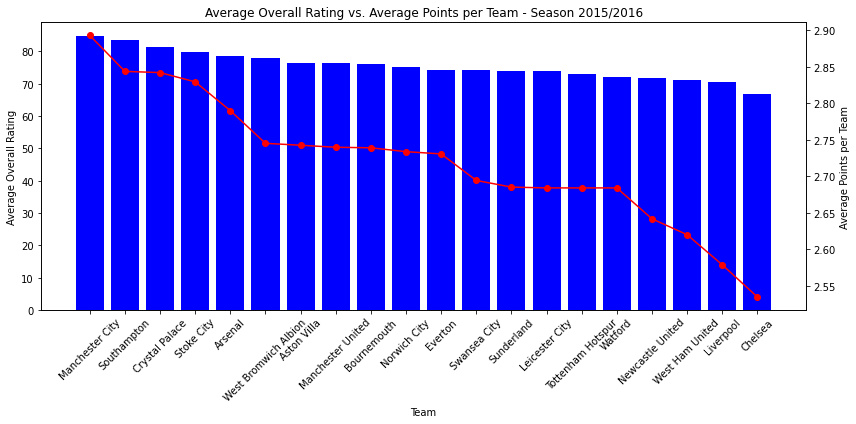

In [13]:
#opdracht 5
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Verbinding maken met de SQLite-database
conn = sqlite3.connect("database.sqlite")

# Gegevens laden vanuit de database
team_df = pd.read_sql_query("SELECT team_api_id, team_long_name FROM Team", conn)
match_df = pd.read_sql_query("SELECT * FROM Match", conn)
player_df = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)

# Databaseverbinding sluiten
conn.close()


# Filteren van gegevens voor het seizoen 2015/2016 van de Premier League
season_df = match_df[(match_df['season'] == '2015/2016') & (match_df['league_id'] == 1729)]
season_df = season_df.merge(team_df, left_on='home_team_api_id', right_on='team_api_id')
season_df = season_df.merge(player_df[['player_api_id', 'overall_rating']], left_on='home_player_1', right_on='player_api_id')

# Gemiddelde overall rating per team berekenen
team_ratings = season_df.groupby('team_long_name')['overall_rating'].mean().sort_values(ascending=False)

# Gemiddeld aantal punten per team berekenen
season_df['home_points'] = np.where(season_df['home_team_goal'] > season_df['away_team_goal'], 3,
                                    np.where(season_df['home_team_goal'] == season_df['away_team_goal'], 1, 0))
season_df['away_points'] = np.where(season_df['away_team_goal'] > season_df['home_team_goal'], 3,
                                    np.where(season_df['away_team_goal'] == season_df['home_team_goal'], 1, 0))
team_points = pd.concat([season_df.groupby('team_long_name')['home_points'].mean(),
                         season_df.groupby('team_long_name')['away_points'].mean()], axis=1).fillna(0)
team_points['total_points'] = team_points['home_points'] + team_points['away_points']
team_points = team_points.sort_values('total_points', ascending=False)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot gemiddelde overall ratings per team
ax1.bar(team_ratings.index, team_ratings.values, color='blue')
ax1.set_xlabel('Team')
ax1.set_ylabel('Average Overall Rating')
ax1.set_title('Average Overall Rating vs. Average Points per Team - Season 2015/2016')
ax1.tick_params(axis='x', rotation=45)

# Maak een tweede y-as voor het gemiddeld aantal punten per team
ax2 = ax1.twinx()
ax2.plot(team_points.index, team_points['total_points'], color='red', marker='o')
ax2.set_ylabel('Average Points per Team')

plt.tight_layout()
plt.show()


In [7]:
#markdown cell de bar char laat zien hoe hoog de average overal rating. Rating Een rating is een numerieke waarde of score die wordt gebruikt om de kwaliteit, prestaties of vaardigheden van een speler te beoordelen.
# hoe hoger de rating des te beter.
# de rode lijn is gemiddelde punten per wedstrijd. je ziet een correlatie tussen hogere rating en hoger punten. Zo zie je namelijk dat Man city de hoogste rating en de meeste puntne heeft.
# ook zie je dat hoe lager de average overal rating hoe lager het gemiddelde punten aantal.


In [ ]:
#6

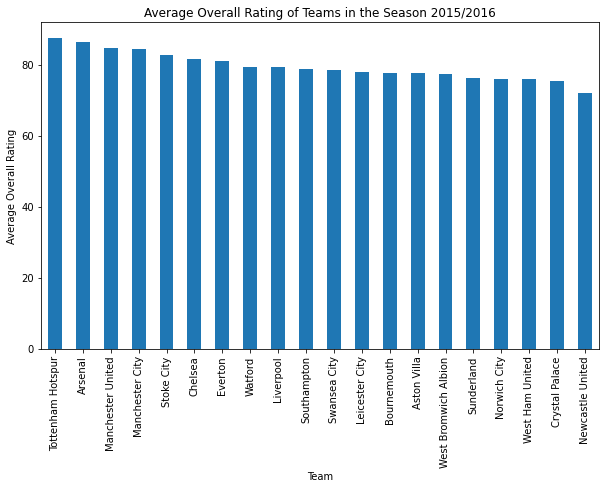

In [8]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Load data from SQLite database
conn = sqlite3.connect("database.sqlite")
team_df = pd.read_sql_query("SELECT team_api_id, team_long_name FROM Team", conn)
match_df = pd.read_sql_query("SELECT * FROM Match", conn)
player_df = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)
conn.close()

# Filter data for the 2015/2016 Premier League season
season_df = match_df[(match_df['season'] == '2015/2016') & (match_df['league_id'] == 1729)]
season_df = season_df.merge(team_df, left_on='home_team_api_id', right_on='team_api_id')
season_df = season_df.merge(player_df[['player_api_id', 'potential']], left_on='home_player_1', right_on='player_api_id')

# Calculate average overall rating for each team
team_ratings = season_df.groupby('team_long_name')['potential'].mean().sort_values(ascending=False)

# Plot the average ratings for each team
fig, ax = plt.subplots()
team_ratings.plot(ax=ax, kind='bar', figsize=(10, 6))
ax.set_xlabel('Team')
ax.set_ylabel('Average Overall Rating')
ax.set_title('Average Overall Rating of Teams in the Season 2015/2016')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# in deze bar chart zie je de average overal rating van premier leuge teams. Rating Een rating is een numerieke waarde of score die wordt gebruikt om de kwaliteit, prestaties of vaardigheden van een speler te beoordelen.
# hoe hoger de rating des te beter.
# Tothtenham hotspur heeft de beste  average overal rating van ongeveer 81 en newcaste de laagste met 75.

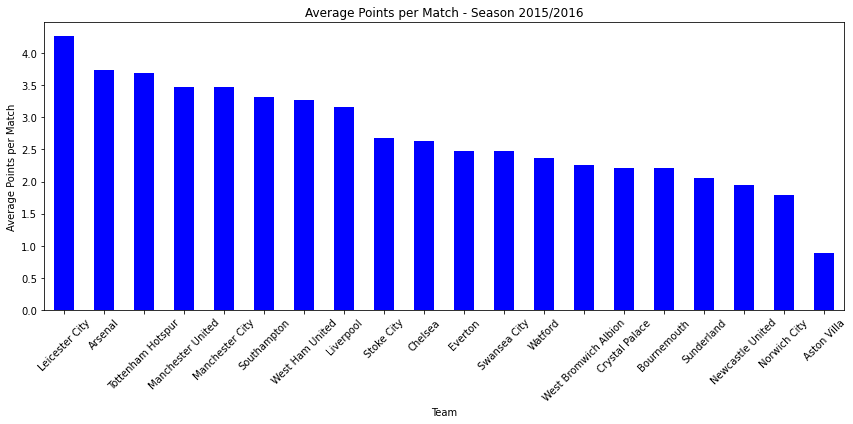

In [9]:
# 4.Maak voor hetzelfde seizoen een visualisatie waarin je het gemiddelde aantal punten per wedstrijd van ieder team laat zien.
#het veranderen van ratings heeft geen directe invloed op de uitkomst
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

conn = sqlite3.connect("database.sqlite")

matches_query = """
    SELECT m.id, t1.team_long_name AS home_team, t2.team_long_name AS away_team, m.home_team_goal, m.away_team_goal
    FROM Match m
    INNER JOIN Team t1 ON t1.team_api_id = m.home_team_api_id
    INNER JOIN Team t2 ON t2.team_api_id = m.away_team_api_id
    WHERE m.season = '2015/2016' AND m.league_id = 1729
"""
matches_df = pd.read_sql_query(matches_query, conn)

matches_df['home_points'] = np.where(matches_df['home_team_goal'] > matches_df['away_team_goal'], 3,
                                     np.where(matches_df['home_team_goal'] == matches_df['away_team_goal'], 1, 0))
matches_df['away_points'] = np.where(matches_df['away_team_goal'] > matches_df['home_team_goal'], 3,
                                     np.where(matches_df['away_team_goal'] == matches_df['home_team_goal'], 1, 0))
team_points_df = pd.concat([matches_df.groupby('home_team')['home_points'].mean(),
                            matches_df.groupby('away_team')['away_points'].mean()], axis=1).fillna(0)
team_points_df['total_points'] = team_points_df['home_points'] + team_points_df['away_points']

team_points_df = team_points_df.sort_values('total_points', ascending=False)

plt.figure(figsize=(12, 6))
team_points_df['total_points'].plot(kind='bar', color='blue')
plt.title('Average Points per Match - Season 2015/2016')
plt.xlabel('Team')
plt.ylabel('Average Points per Match')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

conn.close()

In [ ]:
#markdown cell

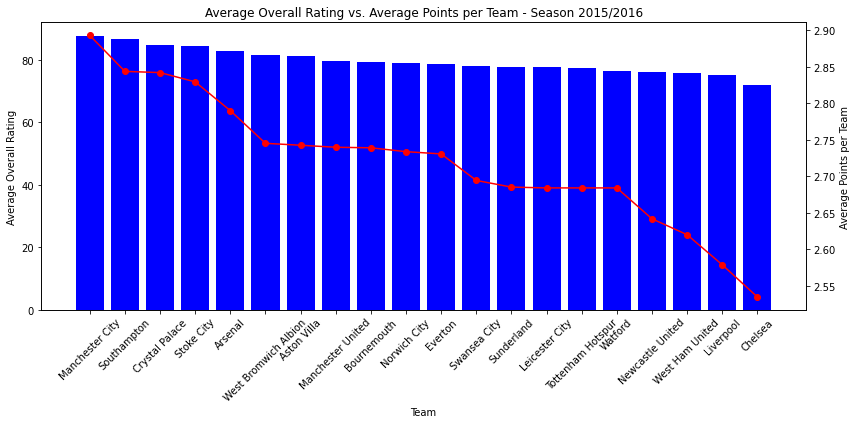

In [10]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Verbinding maken met de SQLite-database
conn = sqlite3.connect("database.sqlite")

# Gegevens laden vanuit de database
team_df = pd.read_sql_query("SELECT team_api_id, team_long_name FROM Team", conn)
match_df = pd.read_sql_query("SELECT * FROM Match", conn)
player_df = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)

# Databaseverbinding sluiten
conn.close()


# Filteren van gegevens voor het seizoen 2015/2016 van de Premier League
season_df = match_df[(match_df['season'] == '2015/2016') & (match_df['league_id'] == 1729)]
season_df = season_df.merge(team_df, left_on='home_team_api_id', right_on='team_api_id')
season_df = season_df.merge(player_df[['player_api_id', 'potential']], left_on='home_player_1', right_on='player_api_id')

# Gemiddelde overall rating per team berekenen
team_ratings = season_df.groupby('team_long_name')['potential'].mean().sort_values(ascending=False)

# Gemiddeld aantal punten per team berekenen
season_df['home_points'] = np.where(season_df['home_team_goal'] > season_df['away_team_goal'], 3,
                                    np.where(season_df['home_team_goal'] == season_df['away_team_goal'], 1, 0))
season_df['away_points'] = np.where(season_df['away_team_goal'] > season_df['home_team_goal'], 3,
                                    np.where(season_df['away_team_goal'] == season_df['home_team_goal'], 1, 0))
team_points = pd.concat([season_df.groupby('team_long_name')['home_points'].mean(),
                         season_df.groupby('team_long_name')['away_points'].mean()], axis=1).fillna(0)
team_points['total_points'] = team_points['home_points'] + team_points['away_points']
team_points = team_points.sort_values('total_points', ascending=False)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot gemiddelde overall ratings per team
ax1.bar(team_ratings.index, team_ratings.values, color='blue')
ax1.set_xlabel('Team')
ax1.set_ylabel('Average Overall Rating')
ax1.set_title('Average Overall Rating vs. Average Points per Team - Season 2015/2016')
ax1.tick_params(axis='x', rotation=45)

# Maak een tweede y-as voor het gemiddeld aantal punten per team
ax2 = ax1.twinx()
ax2.plot(team_points.index, team_points['total_points'], color='red', marker='o')
ax2.set_ylabel('Average Points per Team')

plt.tight_layout()
plt.show()

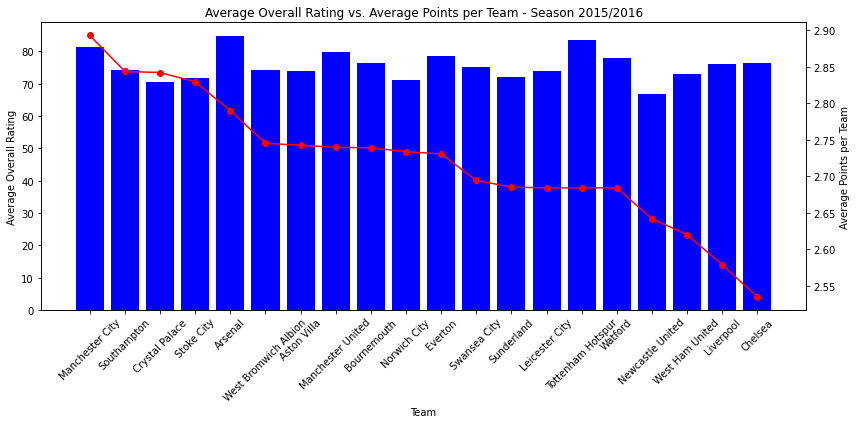

In [17]:
# Sorteer de gemiddelde overall ratings per team op basis van de volgorde van team_points
team_ratings_sorted = team_ratings.reindex(team_points.index)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot gemiddelde overall ratings per team
ax1.bar(team_ratings_sorted.index, team_ratings_sorted.values, color='blue')
ax1.set_xlabel('Team')
ax1.set_ylabel('Average Overall Rating')
ax1.set_title('Average Overall Rating vs. Average Points per Team - Season 2015/2016')
ax1.tick_params(axis='x', rotation=45)

# Maak een tweede y-as voor het gemiddeld aantal punten per team
ax2 = ax1.twinx()
ax2.plot(team_points.index, team_points['total_points'], color='red', marker='o')
ax2.set_ylabel('Average Points per Team')

plt.tight_layout()
plt.show()



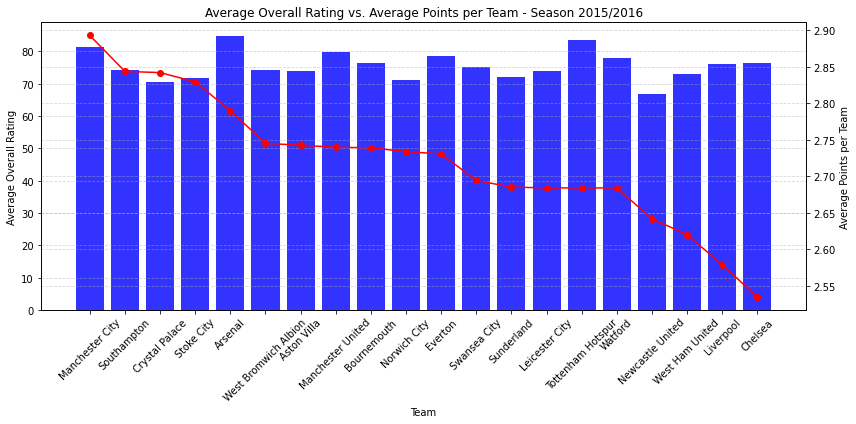

In [20]:
# Samenvoegen van team_ratings en team_points
team_data = pd.concat([team_ratings, team_points['total_points']], axis=1)

# Sorteren op basis van het gemiddelde aantal punten
team_data_sorted = team_data.sort_values('total_points', ascending=False)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot gemiddelde overall ratings per team
ax1.bar(team_data_sorted.index, team_data_sorted['overall_rating'], color='blue', alpha=0.8)
ax1.set_xlabel('Team')
ax1.set_ylabel('Average Overall Rating')
ax1.set_title('Average Overall Rating vs. Average Points per Team - Season 2015/2016')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# Maak een tweede y-as voor het gemiddeld aantal punten per team
ax2 = ax1.twinx()
ax2.plot(team_data_sorted.index, team_data_sorted['total_points'], color='red', marker='o')
ax2.set_ylabel('Average Points per Team')
ax2.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

